# Generating a 1 big dataset called "combined_data.csv" because i realized there should be a number of the session related to its csv' rows. (this file is better) - also notice the dataframe is called "combined_df".
This dataset is a concatenation of several csv's saved in github under "data" folder (you need to download and run this code so it will allow you to upload the csv's in one click and generate the combined_data.csv.

In [122]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Step 1: Upload CSV files
uploaded = files.upload()

# Step 2: Define the function to process the uploaded CSV files
def concatenate_csvs_with_session(filenames, output_file="combined_data.csv"):
    """
    This function takes a list of filenames, loads each CSV file, adds the session number
    extracted from the filename to a 'session' column, concatenates them into a single DataFrame,
    and saves the concatenated data to a CSV file.

    :param filenames: List of CSV filenames (strings).
    :param output_file: The name of the output CSV file to save the concatenated data.
    :return: The combined DataFrame.
    """
    # List to store individual DataFrames
    dfs = []

    # Loop through each file in the list of filenames and load them
    for filename in filenames:
        print(f"Loading file: {filename}")
        df = pd.read_csv(filename)
        # Extract session number from filename (assuming '24_' prefix in filenames)
        session_number = filename.split('_')[1].split('.')[0]  # Extracts the part after '24_' and before '.csv'
        df['session'] = session_number  # Add session column to the DataFrame
        dfs.append(df)  # Append the DataFrame to the list

    # Concatenate all the DataFrames into one large DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)
    print(combined_df.head())  # Display the first few rows of the combined DataFrame

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined DataFrame saved to {output_file}")

    return combined_df

# Step 3: Example usage with the uploaded CSV filenames
filenames = list(uploaded.keys())  # Get the filenames from the uploaded files
combined_df = concatenate_csvs_with_session(filenames, output_file="combined_data.csv")


Saving 24_127.csv to 24_127.csv
Saving 24_128.csv to 24_128.csv
Saving 24_129.csv to 24_129.csv
Saving 24_130.csv to 24_130.csv
Saving 24_131.csv to 24_131.csv
Saving 24_132.csv to 24_132.csv
Saving 24_133.csv to 24_133.csv
Saving 24_134.csv to 24_134.csv
Saving 24_135.csv to 24_135.csv
Saving 24_136.csv to 24_136.csv
Saving 24_137.csv to 24_137.csv
Saving 24_138.csv to 24_138.csv
Saving 24_139.csv to 24_139.csv
Loading file: 24_127.csv
Loading file: 24_128.csv
Loading file: 24_129.csv
Loading file: 24_130.csv
Loading file: 24_131.csv
Loading file: 24_132.csv
Loading file: 24_133.csv
Loading file: 24_134.csv
Loading file: 24_135.csv
Loading file: 24_136.csv
Loading file: 24_137.csv
Loading file: 24_138.csv
Loading file: 24_139.csv
Combined DataFrame shape: (14418, 8)
   knesset session   speaker party         role  \
0      NaN     127       NaN   NaN          NaN   
1      NaN     127  מיקי לוי   NaN        היו"ר   
2      NaN     127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN     127

# Here is the direct function to use the combined_data.csv path without viewing the file (because it doesn't require download)

In [ ]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id={file_id}'

    return path


import pandas as pd

# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/10JrEo5da5m4g-Sb9RfzXYGalD0sQ4V9a/view?usp=drive_link'

# Generate the direct download link
csv_path = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
combined_df = pd.read_csv(csv_path)

# Display the first few rows to confirm it's loaded correctly
print("First few rows of the combined dataset:")
print(combined_df.head())

# Get an overview of the dataset
print("\nCombined Dataset Information:")
print(combined_df.info())

# Check for missing values
print("\nMissing values per column in the combined dataset:")
print(combined_df.isnull().sum())


# This is how to read the dataset, if you use the first link to generate the combined_data.csv

In [193]:
import pandas as pd
combined_df = pd.read_csv(r'combined_data.csv')

In [194]:
combined_df.head()

,knesset,session,speaker,party,role,text,subject,sub_subject
0,NaN,127,NaN,NaN,NaN,"דברי הכנסתחוברת כ""וישיבה קכ""ז",מסמכים שהונחו על שולחן הכנסת,NaN
1,NaN,127,מיקי לוי,NaN,"היו""ר","חברי הכנסת, היום ט' באייר התשפ""ב, 10 במאי 2022...",מסמכים שהונחו על שולחן הכנסת,NaN
2,NaN,127,דן מרזוק,NaN,מזכיר הכנסת,"ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...",מסמכים שהונחו על שולחן הכנסת,NaN
3,NaN,127,מיקי לוי,NaN,"היו""ר",תודה רבה.,נאומים בני דקה,NaN
4,NaN,127,מיקי לוי,NaN,"היו""ר","חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...",נאומים בני דקה,NaN


In [195]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14407 non-null  object 
 3   party        7428 non-null   object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB
None


In [196]:
# Count rows where 'speaker' is NaN and 'party' is 'הליכוד'
nan_speaker_likud = combined_df[(combined_df['speaker'].isna()) & (combined_df['party'] == 'הליכוד')]

# Print the number of such rows
print(f"Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': {nan_speaker_likud.shape[0]}")


Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': 0


In [197]:
# Fill NaN in the 'speaker' column where 'party' is 'הליכוד' and 'speaker' is not NaN
combined_df.loc[combined_df['party'] == 'הליכוד', 'speaker'] = combined_df.loc[combined_df['party'] == 'הליכוד', 'speaker'].fillna('Unknown')

# Verify the change by checking the first few rows and missing values in 'speaker'
print(combined_df.head())
print(f"Missing values in 'speaker': {combined_df['speaker'].isna().sum()}")


   knesset  session   speaker party         role  \
0      NaN      127       NaN   NaN          NaN   
1      NaN      127  מיקי לוי   NaN        היו"ר   
2      NaN      127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN      127  מיקי לוי   NaN        היו"ר   
4      NaN      127  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  
Missing values in 'speaker': 11


In [198]:
# Find the rows where 'speaker' is NaN
combined_df.loc[combined_df['speaker'].isna(), 'speaker'] = pd.NA

# Verify the change
print(f"Number of missing values in 'speaker' after update: {combined_df['speaker'].isna().sum()}")
print(combined_df[combined_df['speaker'].isna()].head())  # Display rows where 'speaker' is NaN


Number of missing values in 'speaker' after update: 11
      knesset  session speaker party role  \
0         NaN      127    <NA>   NaN  NaN   
2048      NaN      129    <NA>   NaN  NaN   
4006      NaN      130    <NA>   NaN  NaN   
4077      NaN      131    <NA>   NaN  NaN   
4707      NaN      132    <NA>   NaN  NaN   

                                                   text  \
0                         דברי הכנסתחוברת כ"וישיבה קכ"ז   
2048  דברי הכנסתכז / מושב שני / ישיבות קכ"ט–קל"א /ט"...   
4006                       דברי הכנסתחוברת כ"זישיבה ק"ל   
4077                      דברי הכנסתחוברת כ"זישיבה קל"א   
4707  דברי הכנסתכח / מושב שני / ישיבות קל"ב–קל"ד /כ"...   

                           subject sub_subject  
0     מסמכים שהונחו על שולחן הכנסת         NaN  
2048  מסמכים שהונחו על שולחן הכנסת         NaN  
4006  מסמכים שהונחו על שולחן הכנסת         NaN  
4077                שאילתות דחופות         NaN  
4707  מסמכים שהונחו על שולחן הכנסת         NaN  


In [199]:
import numpy as np

# Set the rows where 'speaker' is NaN to explicitly have 'NaN' (using numpy NaN)
combined_df.loc[combined_df['speaker'].isna(), 'speaker'] = np.nan

# Verify the change
print(f"Number of missing values in 'speaker' after update: {combined_df['speaker'].isna().sum()}")
print(combined_df[combined_df['speaker'].isna()].head())  # Display rows where 'speaker' is NaN


Number of missing values in 'speaker' after update: 11
      knesset  session speaker party role  \
0         NaN      127     NaN   NaN  NaN   
2048      NaN      129     NaN   NaN  NaN   
4006      NaN      130     NaN   NaN  NaN   
4077      NaN      131     NaN   NaN  NaN   
4707      NaN      132     NaN   NaN  NaN   

                                                   text  \
0                         דברי הכנסתחוברת כ"וישיבה קכ"ז   
2048  דברי הכנסתכז / מושב שני / ישיבות קכ"ט–קל"א /ט"...   
4006                       דברי הכנסתחוברת כ"זישיבה ק"ל   
4077                      דברי הכנסתחוברת כ"זישיבה קל"א   
4707  דברי הכנסתכח / מושב שני / ישיבות קל"ב–קל"ד /כ"...   

                           subject sub_subject  
0     מסמכים שהונחו על שולחן הכנסת         NaN  
2048  מסמכים שהונחו על שולחן הכנסת         NaN  
4006  מסמכים שהונחו על שולחן הכנסת         NaN  
4077                שאילתות דחופות         NaN  
4707  מסמכים שהונחו על שולחן הכנסת         NaN  


In [200]:
# Count the number of NaN values in the 'speaker' column
nan_count_in_speaker = combined_df['speaker'].isna().sum()

# Print the result
print(f"Number of NaN values in the 'speaker' column: {nan_count_in_speaker}")


Number of NaN values in the 'speaker' column: 11


In [201]:
# Count rows where 'speaker' is NaN and 'party' is 'הליכוד'
nan_speaker_likud = combined_df[(combined_df['speaker'].isna()) & (combined_df['party'] == 'הליכוד')]

# Print the number of such rows
print(f"Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': {nan_speaker_likud.shape[0]}")

Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': 0


In [202]:
#How many missing in each coulmn
print(combined_df.isna().sum())

knesset        14418
session            0
speaker           11
party           6990
role            8087
text               4
subject            0
sub_subject     5188
dtype: int64


In [203]:
combined_df.party.unique()
#one is called nan (probably a mistake or something we need to cleanup).
#At the end, there are a list of parties which i am not sure what they are exactly, so we need to check that later using knesset website.

array([nan, 'ש"ס', 'מרצ', 'יש עתיד', 'הציונות הדתית', 'הרשימה המשותפת',
       'הליכוד', 'כחול לבן', 'יהדות התורה', 'ישראל ביתנו', 'תקווה חדשה',
       'ימינה', 'העבודה', 'רע"מ – רשימת האיחוד הערבי',
       'בשם ועדת העבודה והרווחה', 'בשם ועדת הכנסת', "פריג'",
       'בשם ועדת הכלכלה', 'בשם ועדת ביטחון הפנים'], dtype=object)

In [204]:
combined_df.session.unique()

array([127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [205]:
combined_df.role.unique()

array([nan, 'היו"ר', 'מזכיר הכנסת', 'שר החקלאות ופיתוח הכפר',
       'יו"ר ועדת העבודה והרווחה', 'שרת הכלכלה והתעשייה',
       'השר לפיתוח הפריפריה, הנגב והגליל', 'שר המשפטים', 'שר התקשורת',
       'ראש הממשלה', 'שר הביטחון', 'שרת החינוך',
       'השר המקשר בין הממשלה לבין הכנסת', 'יו"ר ועדת הכנסת',
       'סגן שרת הכלכלה והתעשייה', 'שר התיירות', 'שר הבריאות',
       'סגן השר לביטחון הפנים', 'סגנית מזכיר הכנסת', 'סגן שר החוץ',
       'שרת התחבורה והבטיחות בדרכים', 'יו"ר', 'השר במשרד האוצר',
       'סגן שר הביטחון', 'שרת האנרגיה', 'ראש', 'יו"ר ועדת הכספים',
       'שר הרווחה והביטחון החברתי', 'שר המודיעין', 'סגן השר לשירותי דת',
       'שרת הפנים', 'עאידה', 'שר החוץ', 'השרה להגנת הסביבה', 'יו"ר הכנסת',
       'נשיאת הפרלמנט האירופי', 'יו"ר ועדת החוץ והביטחון',
       'שר לביטחון הפנים', 'שר הבינוי והשיכון', 'סגן שרת החינוך',
       'שר התרבות והספורט', 'סגן שר במשרד ראש הממשלה',
       'השרה לשוויון חברתי וגמלאים', 'השר לירושלים ומורשת',
       'יו"ר הוועדה המשותפת', 'שר התפוצות', 'שרת 

In [206]:
combined_df.speaker.unique()

array([nan, 'מיקי לוי', 'דן מרזוק', 'אוריאל בוסו', 'מוסי רז',
       'בועז טופורובסקי', 'אבי מעוז', 'עופר כסיף', 'משה אבוטבול',
       'גבי לסקי', 'יולי יואל אדלשטיין', 'מופיד מרעי', 'אחמד טיבי',
       'ישראל אייכלר', 'טטיאנה מזרסקי', 'יבגני סובה', 'צבי האוזר',
       'ניר אורבך', 'גלעד קריב', 'עודד פורר', 'אפרת רייטן מרום',
       'אורלי לוי אבקסיס', 'נעמה לזימי', 'דוד ביטן', 'אורי מקלב',
       'יוסף טייב', 'אוסאמה סעדי', 'יעל רון בן משה', 'משה טור פז',
       'אורנה ברביבאי', 'ענבר בזק', 'לימור מגן תלם', 'עלי סלאלחה',
       'גדעון סער', 'יריב לוין', 'איתן גינזבורג', 'יעקב מרגי', 'רון כץ',
       'יועז הנדל', 'שמחה רוטמן', 'יעקב אשר', 'אופיר אקוניס', 'נפתלי בנט',
       'בנימין נתניהו', 'קריאה', 'קריאות', 'אופיר כץ', 'מירב בן ארי',
       'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי', 'פטין מולא',
       'אמיר אוחנה', 'מאי גולן', 'משה ארבל', "בצלאל סמוטריץ'",
       'בנימין גנץ', 'איתמר בן גביר', 'עאידה תומא סלימאן', 'איימן עודה',
       'יפעת שאשא ביטון', 'מירי מרים רגב', 'זאב אל

In [207]:
len(combined_df.speaker.unique())

148

****צריכים להיות רק 120 חברי כנסת***

You can see everything in the dataset is a string (object) and only one column is float64 (but this column is the same for all sessions because it is knesset 24).

Also there are important missing objects in column:  party, role, sub-subject
And another missing objects in other columns : role, sub_subject, knesset

No missing objects in columns: session, subject (subject might have strong relation with the text being said under a specific subject)

In order to address the features or new features, they are all need to be numeric for the pair plot, so we can pick the relevant features (for linear regression, the first model, we should see a linear connection for example).

The target (label) y in this regression problem is "Num_of_text_rows" spoken by **any** of the הליכוד speakers, so we need a column that counts how many rows each unique speaker spoke at a **specific** session. (again a numeric column)

the features X could be whatever we choose.
possible features:

1. לכל חבר כנסת יש דירוג מספרי במפלגה שלו אז חשבתי לשים בכל מפלגה את דירוג החבר ואולי הדירוג משפיע על כמה שאותו חבר כנסת מדבר.
2. גודל המפלגה הוא כגודל המנדטים או כמות החברי כנסת במפלגה ובכל מקרה גם זה נומרי וגם זה יישתל בעמודה ניפרדת בהתאם למפלגה. ייתכן וזה משפיע מאוד על כמות הדיבור במליאה, כי גודל הזמן שניתן לדיבור במליאה הינו בקשר ישיר לגודל המפלגה, עפ"י מה שכתוב באתר הכנסת.
3. count לספור את מספר התווים בכל טקסט וכך בכל שורה יהיה נתון מספרי כמה החבר כנסת פותח את הפה. זה ייקח בחשבון כל תו כי יש טקסט שלפעמים אין בו כלום חוץ מסתם קיווקוו או רווח ויובל אמר שגם את זה אנו צריכים לספור.
4. count vectorizer (bag of words) - למעשה זה כמו פיצ'ר 3 אבל כאן יש דגש על המילים שהכי נאמרות בקובץ טקסט וכמה מכל מילה כזו יש, צריך לקחת בחשבון שלמעשה זה יוצר המון עמודות וצריך להגביל את זה אחרת יש בעיה של n>>p.

Imputing party in corrsepondance with speaker -
We need to impute the right party to the right speaker and that is something i did, and still working on. this is super important because if there is even one additional note then the code will not manage to capture and impute the party for that speaker with the same name + diffrenet number of notes.

## Creating a dictionary of הליכוד roles per speaker חבר כנסת and imputing them to the role column. details were taken from אתר הכנסת

In [208]:
# # Cleaned dictionary with correct syntax and no empty strings
# dict_knesset_24 = {
#     'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
#     'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
#     'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
#     'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
#     'בנימין נתניהו': 'ראש הממשלה',
#     'אופיר כץ': 'חבר כנסת מטעם הליכוד',
#     'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'שלמה קרעי': 'שר התקשורת',
#     'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'אמיר אוחנה': 'יושב–ראש הכנסת',
#     'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
#     'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
#     'אלי כהן': 'שר האנרגיה והתשתיות',
#     'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
#     'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'ישראל כץ': 'שר החוץ',
#     'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
#     'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'ניר ברקת': 'שר הכלכלה והתעשייה',
#     'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
#     'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'דוד ביטן': 'יו"ר ועדת הכלכלה',
#     'חיים כץ': 'שר התיירות',
#     'גילה גמליאל': 'שרת המודיעין',
#     'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'מכלוף מיקי זוהר': 'שר התרבות והספורט',
#     'צחי הנגבי': 'שר לעניינים אסטרטגיים'
# }

# # Use the dictionary to fill the 'role' column for speakers with missing roles
# combined_df.loc[:, 'role'] = combined_df.apply(
#     lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
# )

# # Verify the change
# print(combined_df.head())
# print(f"Number of missing roles: {combined_df['role'].isna().sum()}")




In [209]:
# # Display the speaker and role columns
# speaker_role_result = combined_df[['speaker', 'role']]

# # Show the first few rows to verify
# speaker_role_result.head(10)

In [210]:

# Count unique speaker-role pairs
#unique_speaker_role_count = speaker_role_result.drop_duplicates()

#unique_speaker_role_count

In [211]:

# Count unique speaker-role pairs
#unique_speaker_role_count = speaker_role_result.drop_duplicates().shape[0]

# Display the count
#unique_speaker_role_count


#So the imputation need to be for 173 pairs by speaker and role.
#And those lucking a role need to be found.

In [212]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14407 non-null  object 
 3   party        7428 non-null   object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


In [213]:
# # Filter rows where 'role' is missing but 'speaker' is not null
# missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]

# # Display the rows with missing 'role'
# print("Rows with missing 'role' for a valid 'speaker':")
# print(missing_roles)


In [214]:
# # Find unique speakers where 'role' is missing
# speakers_with_missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]['speaker'].unique()

# # Display the unique speakers
# print("Speakers with missing roles:")
# print(speakers_with_missing_roles)


In [215]:
# # Count the number of unique speakers with missing roles
# unique_speakers_count = len(speakers_with_missing_roles)

# unique_speakers_count

# #unique speakers with missing roles=86

# Provided likud speakers in the dataset

In [216]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()
print(likud_speakers)

# Step 2: Count the number of unique speakers
likud_speaker_count = len(likud_speakers)
print(f"Number of unique speakers in הליכוד: {likud_speaker_count}")



['יולי יואל אדלשטיין' 'אורלי לוי אבקסיס' 'יריב לוין' 'אופיר אקוניס'
 'בנימין נתניהו' 'אופיר כץ' 'דוד אמסלם' 'גלית דיסטל אטבריאן' 'שלמה קרעי'
 'פטין מולא' 'אמיר אוחנה' 'מאי גולן' 'מירי מרים רגב' 'יואב קיש' 'אלי כהן'
 'יואב גלנט' 'דסטה גדי יברקן' 'ישראל כץ' 'יובל שטייניץ' 'קטי קטרין שטרית'
 'ניר ברקת' 'אבי דיכטר' 'קרן ברק' 'דוד ביטן' 'חיים כץ' 'גילה גמליאל'
 'חוה אתי עטייה' 'מכלוף מיקי זוהר' 'צחי הנגבי']
Number of unique speakers in הליכוד: 29


# likud speakers that are missing in the dataset: {'אלי כהן', 'קטי קטרין שטרית'}



In [217]:
# Provided list of Likud speakers from knesset website (knesset 24)
likud_speakers_provided = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
    ]

# Assuming `likud_speakers` is the original list of Likud speakers from your dataset:
# These are the speakers in the combined_data.csv.
likud_speakers_dataset = [
'יולי יואל אדלשטיין', 'אורלי לוי אבקסיס', 'יריב לוין', 'אופיר אקוניס',
 'בנימין נתניהו', 'אופיר כץ', 'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי',
 'פטין מולא', 'אמיר אוחנה', 'מאי גולן', 'מירי מרים רגב', 'יואב קיש', 'אלי כהן',
 'יואב גלנט', 'דסטה גדי יברקן', 'ישראל כץ', 'יובל שטייניץ', 'קטי קטרין שטרית',
 'ניר ברקת', 'אבי דיכטר', 'קרן ברק', 'דוד ביטן', 'חיים כץ', 'גילה גמליאל',
 'חוה אתי עטייה', 'מכלוף מיקי זוהר', 'צחי הנגבי'
]

# Step 1: Count the number of unique speakers in the provided list
provided_count = len(likud_speakers_provided)
print(f"Number of unique speakers in the provided list: {provided_count}")

# Step 2: Find missing speakers from the dataset-derived list
missing_speakers = set(likud_speakers_dataset) - set(likud_speakers_provided)
print(f"Speakers in the dataset but not in the provided list: {missing_speakers}")


Number of unique speakers in the provided list: 31
Speakers in the dataset but not in the provided list: {'אלי כהן', 'קטי קטרין שטרית'}


In [218]:
# Step 1: Capture the original unique parties before any modifications
original_parties = set(combined_df['party'].dropna().unique())  # Drop NaN to consider only valid parties

# Step 2: Apply transformations to the DataFrame (imputation or corrections)
# Updating the 'party' column based on the 'speaker' list
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & (combined_df['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Step 3: Capture the unique parties after the modifications
updated_parties = set(combined_df['party'].dropna().unique())

# Step 4: Calculate added and removed parties
added_parties = updated_parties - original_parties
removed_parties = original_parties - updated_parties

# Step 5: Print the results
print(f"Number of parties added: {len(added_parties)}")
print(f"Added parties: {added_parties}")
print(f"Number of parties removed: {len(removed_parties)}")
print(f"Removed parties: {removed_parties}")


Number of parties added: 0
Added parties: set()
Number of parties removed: 0
Removed parties: set()


In [219]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14407 non-null  object 
 3   party        7701 non-null   object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


In [220]:
#ORIGINAL CODE** I used the code below instead******************
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & (combined_df['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(combined_df.head())

#In this code these are the same number of changes in step 2 and 3. meannig they are the same  speakers in both stages.
#So I created the code below with a condition in stage 3:

##### Of course they are the same speakers of likud, but i was trying to impute the party for the speakers from likud
##### who don't have a party
##### and for those who have a mistake in the party (=different than likud) and to also change there to likud



   knesset  session   speaker party         role  \
0      NaN      127       NaN   NaN          NaN   
1      NaN      127  מיקי לוי   NaN        היו"ר   
2      NaN      127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN      127  מיקי לוי   NaN        היו"ר   
4      NaN      127  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  


In [ ]:
print(set(df['party']) - set(combined_df['party']))  # Added parties
print(set(combined_df['party']) - set(df['party']))  # Removed parties


In [ ]:
#CORECTED CODE
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()

#checking stage 2
# Count rows BEFORE the update
before_update_count = combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna()].shape[0]

# Update the 'party' column
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'

# Count rows AFTER the update
after_update_count = combined_df.loc[(combined_df['speaker'].isin(likud_speakers)) & (combined_df['party'] == 'הליכוד')].shape[0]

# Display the number of rows that were updated
updated_rows_count = after_update_count - before_update_count
print(f"Number of rows updated to 'הליכוד': {updated_rows_count}")


In [ ]:
#Checking stage 3 WE NEED THIS CONDITION OTHERWISE WE GET THE SAME NUMBER OF UPDATED ROWS IN STAGE 3 THAT WERE ALREADY UPDATED IN STAGE 2
# תנאי שלב 3 מתוקן
step_3_condition = (
    combined_df['speaker'].isin(likud_speakers) &
    (combined_df['party'] != 'הליכוד') &
    combined_df['party'].notna()  # לוודא שלא מדובר בשורות שעודכנו בשלב 2
)

# ספירת שורות בשלב 3 לאחר התיקון
step_3_rows_fixed = combined_df.loc[step_3_condition]
print(f"שורות לעדכון בשלב 3 לאחר התיקון: {step_3_rows_fixed.shape[0]}")

# ביצוע עדכון שלב 3
combined_df.loc[step_3_condition, 'party'] = 'הליכוד'





In [ ]:
# Count the number of rows with 'nan' in the 'party' column
combined_df['party'].isna().sum()


That is a list of speakers that don't have a role in the role column:

In [ ]:
# Filter the rows where 'role' is either nan or an empty string
filtered_speakers = combined_df[combined_df['role'].isna() | (combined_df['role'] == '')]

# Get the unique 'speaker' values from the filtered rows
unique_speakers_with_no_role = filtered_speakers['speaker'].unique()

# Print the unique speakers
print("Unique speakers with no role (nan or empty):")
for speaker in unique_speakers_with_no_role:
    print(speaker)


In [ ]:
#how many
len(speakers_with_missing_roles)


In this list we see the speakers that have a party and which speaker is grouped in which party :

In [ ]:
# Group by 'party' and list the speakers associated with each party
grouped_by_party = combined_df.groupby('party')['speaker'].apply(list).reset_index()

# Display the grouped information
print(grouped_by_party)


Again speakers grouped in parties but now the unique speakers, better visualization :

In [ ]:
# Group by 'party' and list unique speakers associated with each party
grouped_by_party_unique = combined_df.groupby('party')['speaker'].apply(lambda x: list(set(x))).reset_index()

# Display the grouped information with unique speakers
print(grouped_by_party_unique)


## Creating a dictionary of speaker with their corresponding party to try and impute the parties, in order to reduce number of missing parties (again using knesset website)

In [ ]:
import pandas as pd

# DataFrame with columns ['Speaker', 'Party']
# Create a dictionary manually for each speaker with their corresponding party
speaker_to_party = {
    'מיקי לוי': 'יש עתיד',
    'יעקב אשר': 'יהדות התורה',
    'דוד ביטן': 'הליכוד',
    'איתן גינזבורג': 'כחול לבן',
    'צבי האוזר': 'תקווה חדשה',
    'אחמד טיבי': 'הרשימה המשותפת',
    'אמילי מואטי': 'העבודה',
    'יעקב מרגי': 'ש"ס',
    'יבגני סובה': 'ישראל ביתנו',
    'מנסור עבאס': 'רע"מ',
    'זועבי': 'מרצ',
    'ניר אורבך': 'ימינה',
    'אלכס קושניר': 'ישראל ביתנו',
    'מיכאל ביטון': 'כחול לבן',
    'רם בן ברק': 'יש עתיד',
    'סעיד אלחרומי': 'רע"מ',
    'וליד טאהא': 'רע"מ',
    'גלעד קריב': 'העבודה',
    'שרן השכל': 'תקווה חדשה',
    'אפרת רייטן': 'העבודה',
    'עידית סילמן': 'ימינה',
    'מירב בן-ארי': 'יש עתיד',
    'יוליה מלינובסקי': 'ישראל ביתנו',
    'עאידה תומה סלימאן': 'הרשימה המשותפת',
    'מיכל שיר': 'תקווה חדשה',
    'יעל רון בן משה': 'כחול לבן',
    'מוסי רז': 'מרצ',
    'רם שפע': 'העבודה',
    'אבתיסאם מראענה': 'העבודה',
    'יריב לוין': 'הליכוד',
    'בועז טופורובסקי': 'יש עתיד',
    'מיכאל מלכיאלי': 'ש"ס',
    'ישראל אייכלר': 'יהדות התורה',
    'אורית סטרוק': 'הציונות הדתית',
    'סאמי אבו שחאדה': 'הרשימה המשותפת',
    'מיכל רוזין': 'מרצ',
    'בנימין נתניהו': 'הליכוד'
    # Add more speakers and their corresponding party information here
}

# Replace all 'Party' values using the 'Speaker' to 'Party' mapping
combined_df['party'] = combined_df['speaker'].map(speaker_to_party)


In [ ]:
print(combined_df.info())  #For some reason after your imputaion above we have less party count compared to the original party count in the start of the file, party was=7428  non-noul

In [ ]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")


In [ ]:
# Impute 'party' based on 'speaker'
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [ ]:
missing_parties = combined_df[combined_df['party'].isna()]
print(missing_parties[['speaker', 'party']])


##These are the unique speakers that are still remained unmapped, look at the notes in some of their names:

In [ ]:
# Check unique unmapped speakers
unmapped_speakers = combined_df[combined_df['party'].isna() & combined_df['speaker'].notna()]['speaker'].unique()
print(unmapped_speakers)


Number of rows with missing party :

In [ ]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")

In [ ]:
import pandas as pd

# Step 1: Define the speaker-to-party mapping
speaker_to_party = {}

# Add mappings for each party
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
]
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"
#######################################################
# Add mappings for other parties (shortened for brevity, use your full list)
yesh_atid_speakers = ["יאיר לפיד", "מירב כהן", "אורנה ברביבאי"]
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"
#####################################################
# Add Shas speakers to the mapping
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]

# Assign "ש\"ס" to all these speakers
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"
####################################################
# Add Blue and White speakers to the mapping
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו"
]

# Assign "כחול לבן" to all these speakers
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"
#####################################################
# Add יהדות התורה speakers to the mapping
yahadut_hatora_speakers = [
    "ישראל אייכלר",
    "יעקב אשר",
    "אליהו ברוכי",
    "משה גפני",
    "יעקב טסלר",
    "יעקב ליצמן",
    "אורי מקלב",
   "יצחק זאב פינדרוס",
   "מאיר פרוש"
]

# Assign "יהדות התורה" to all these speakers
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"
#################################################
# Add ימינה speakers to the mapping
yamina_speakers = [
      "ניר אורבך",
      "נפתלי בנט",
      "מתן כהנא",
      "יום טוב חי כלפון",
      "עידית סילמן",
      "שירלי פינטו קדוש",
      "אביר קארה",
      "עמיחי שיקלי",
      "אילת שקד"
]

# Assign " ימינה" to all these speakers
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"
##################################################
# Add הרשימה המשותפת speakers to the mapping
hareshima_hameshutefet_speakers = [
      "סמי אבו שחאדה",
      "אחמד טיבי",
      "עופר כסיף",
      "אוסאמה סעדי",
      "איימן עודה",
      "עאידה תומא סלימאן"
]

# Assign " הרשימה המשותפת" to all these speakers
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"
####################################################
# Add  מרצ speakers to the mapping
meretz_speakers = [
      "יאיר גולן",
      "ניצן הורוביץ",
      "תמר זנדברג",
      "גבי לסקי",
      "עלי סלאלחה",
      "'/עיסאווי פריג",
      "מיכל רוזין",
      "מוסי רז",
ג'/ידא רינאוי זועבי
# Assign "  מרצ" to all these speakers
for speaker in meretz_speakers:
    speaker_to_party[speaker] =  "מרצ"
###################################################
# Add  הציונות הדתית speakers to the mapping
hazionut_hadatit_speakers = [
      "איתמר בן גביר",
      "מיכל מרים וולדיגר",
      "אבי מעוז",
      "אופיר סופר",
      "אורית סטרוק",
      "'/בצלאל סמוטריץ",
      "שמחה רוטמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] =  "הציונות הדתית"
##################################################
# Add תקווה חדשה Speakers to the mapping
tikva_hadasha_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  תקווה חדשה" to all these speakers
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"
###################################################
# Add S הרשימה הערבית המאוחדת  speakers to the mapping
hareshima_haaravit_speakers = [

        " סעיד אלחרומי",
        "מאזן גנאים",
        "אימאן חטיב יאסין",
        "ווליד טאהא",
        "מנסור עבאס",
]

# Assign "  הרשימה הערבית המאוחדת "" to all these speakers
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] =  "הרשימה הערבית המאוחדת"
#################################################
# Step 2: Define the pipeline
def preprocess_data(df):
    """
    Preprocess the DataFrame to impute missing parties and compute party_row_count.
    """
    # Impute missing parties based on the speaker name
    df['party'] = df.apply(
        lambda row: speaker_to_party.get(row['speaker'], row['party']),
        axis=1
    )

    # Recompute party_row_count
    party_counts = (
        df.groupby(['session', 'party'])
        .size()
        .reset_index(name='party_row_count')
    )
    df = df.merge(party_counts, on=['session', 'party'], how='left')

    return df

df = pd.DataFrame(combined_df)

# Process the data
processed_combined_df = preprocess_data(df)

# Display the result
print(processed_combined_df)


In [ ]:
processed_combined_df.head(20)

In [ ]:
processed_combined_df.info()

In [ ]:
def preprocess_data(df):
    """
    Preprocess the DataFrame to impute missing parties and compute party_row_count.
    """
    # Ensure the DataFrame contains the necessary columns
    required_columns = {'speaker', 'party', 'session'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")

    # Impute missing 'party' values based on the speaker name
    df['party'] = df.apply(
        lambda row: speaker_to_party.get(row['speaker'], row['party']),
        axis=1
    )

    # Compute party_row_count for each combination of session and party
    party_counts = (
        df.groupby(['session', 'party'])
        .size()
        .reset_index(name='party_row_count')
    )

    # Merge the computed counts back into the original DataFrame
    df = df.merge(party_counts, on=['session', 'party'], how='left')

    return df


In [ ]:
processed_combined_df = preprocess_data(combined_df)
print(processed_combined_df)

##These are the mapping of the speakers from הליכוד : (based on knesset website, knesset 24)


In [ ]:
# Add Likud speakers to the mapping
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
]

# Assign "הליכוד" to all these speakers
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"


##These are the mapping of the speakers from יש עתיד : (based on knesset website, knesset 24)

In [ ]:
# Add Yesh Atid speakers to the mapping
yesh_atid_speakers = [
    "קארין אלהרר", "ענבר בזק", "ולדימיר בליאק", "מירב בן ארי", "רם בן ברק",
    "אורנה ברביבאי", "סימון דוידסון", "בועז טופורובסקי", "משה טור פז", "מאיר כהן",
    "מירב כהן", "רון כץ", "יוראי להב הרצנו", "מיקי לוי", "יאיר לפיד",
    "טטיאנה מזרסקי", "יואב סגלוביץ", "יסמין פרידמן", "עידן רול",
    "יואל רזבוזוב", "אלעזר שטרן", "נירה שפק"
]

# Assign "יש עתיד" to all these speakers
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"


##These are the mapping of the speakers from ש"ס: (based on knesset website, knesset 24)

In [ ]:
# Add Shas speakers to the mapping
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]

# Assign "ש\"ס" to all these speakers
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"


##These are the mapping of the speakers from כחול לבן : (based on knesset website, knesset 24)

In [ ]:
# Add Blue and White speakers to the mapping
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו"
]

# Assign "כחול לבן" to all these speakers
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"


##These are the mapping of the speakers from יהדות התורה: (based on knesset website, knesset 24)

In [ ]:
# Add יהדות התורה speakers to the mapping
yahadut_hatora_speakers = [
    "ישראל אייכלר",
    "יעקב אשר",
    "אליהו ברוכי",
    "משה גפני",
    "יעקב טסלר",
    "יעקב ליצמן",
    "אורי מקלב",
   "יצחק זאב פינדרוס",
   "מאיר פרוש"
]

# Assign "יהדות התורה" to all these speakers
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"

##These are the mapping of the speakers from ימינה : (based on knesset website, knesset 24)

In [ ]:
# Add ימינה speakers to the mapping
yamina_speakers = [
      "ניר אורבך",
      "נפתלי בנט",
      "מתן כהנא",
      "יום טוב חי כלפון",
      "עידית סילמן",
      "שירלי פינטו קדוש",
      "אביר קארה",
      "עמיחי שיקלי",
      "אילת שקד"
]

# Assign " ימינה" to all these speakers
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"


##These are the mapping of the speakers from הרשימה המשותפת : (based on knesset website, knesset 24)

In [ ]:
# Add הרשימה המשותפת speakers to the mapping
hareshima_hameshutefet_speakers = [
      "סמי אבו שחאדה",
      "אחמד טיבי",
      "עופר כסיף",
      "אוסאמה סעדי",
      "איימן עודה",
      "עאידה תומא סלימאן"
]

# Assign " הרשימה המשותפת" to all these speakers
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"

##These are the mapping of the speakers from מרצ : (based on knesset website, knesset 24)

In [ ]:
# Add  מרצ speakers to the mapping
meretz_speakers = [
      "יאיר גולן",
      "ניצן הורוביץ",
      "תמר זנדברג",
      "גבי לסקי",
      "עלי סלאלחה",
      "'/עיסאווי פריג",
      "מיכל רוזין",
      "מוסי רז",
      "ג/'ידא רינאוי זועבי"
]

# Assign "  מרצ" to all these speakers
for speaker in meretz_speakers:
    speaker_to_party[speaker] =  "מרצ"

In [ ]:
# Add  הציונות הדתית speakers to the mapping
hazionut_hadatit_speakers = [
      "איתמר בן גביר",
      "מיכל מרים וולדיגר",
      "אבי מעוז",
      "אופיר סופר",
      "אורית סטרוק",
      "'/בצלאל סמוטריץ",
      "שמחה רוטמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] =  "הציונות הדתית"

##These are the mapping of the speakers from תקווה חדשה : (based on knesset website, knesset 24)

In [ ]:
# Add תקווה חדשה Speakers to the mapping
tikva_hadasha_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"

##These are the mapping of the speakers from הרשימה הערבית המאוחדת : (based on knesset website, knesset 24)

In [ ]:
# Add S הרשימה הערבית המאוחדת  speakers to the mapping
hareshima_haaravit_speakers = [

        " סעיד אלחרומי",
        "מאזן גנאים",
        "אימאן חטיב יאסין",
        "ווליד טאהא",
        "מנסור עבאס",
]

# Assign "  הרשימה הערבית המאוחדת "" to all these speakers
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] =  "הרשימה הערבית המאוחדת"

In [ ]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [ ]:
# Update the party mapping for the remaining speakers
remaining_speakers_to_party = {
    "תומא סלימאן (הרשימה המשותפת)": "הרשימה המשותפת",
    "בצלאל סמוטריץ'": "הציונות הדתית",  # Add other parties as needed
    "בנימין גנץ": "כחול לבן",
    "ישראל אייכלר": "יהדות התורה",
    "מאיר פרוש": "יהדות התורה",
    "ראדה חסייסי": "הרשימה המשותפת",
    # Add other mappings as needed
}

# Apply the updated mapping
for speaker, party in remaining_speakers_to_party.items():
    speaker_to_party[speaker] = party


In [ ]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))

In [ ]:
combined_df['party'].info()

In [ ]:
#i want to see all mising speakers:
# Ensure all rows are displayed in the console
import pandas as pd
pd.set_option('display.max_rows', None)  # Remove row limit
pd.set_option('display.max_columns', None)  # Remove column limit for wide DataFrames

# Filter and display the remaining rows with missing 'party'
remaining_missing = combined_df[combined_df['party'].isna()]
print(remaining_missing[['speaker', 'party']].drop_duplicates())

# Optional: Reset display options after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


In [ ]:
# Code before stopping #it doesnt really stop when i use run all
print("This will run")

# Add a manual breakpoint
breakpoint()  # Stops here in debugging mode

# Code after stopping
print("This will not run until you continue debugging")


In [ ]:
#when I try to run this the party count changes bakwords
#maybe not use it-but the informatio is important


#Filling the rEMINING SPEAKERS WITHOUT PARTIES:
# I have some notes for some of the NA speakers that we can drop, they dont belong to any party


# Create a dictionary manually for each speaker with their corresponding party
speaker_to_party = {
    'דן מרזוק': 'NA',          #He is secretery of the knesset, doesnt belongs to any party
    'עופר כסיף': 'חד"ש',
    'עודד פורר': 'ישראל ביתנו',
    'רון כץ': 'יש עתיד',
    'יועז הנדל': 'תקווה חדשה',
    'שמחה רוטמן': 'הציונות הדתית',
    'אופיר אקוניס': 'הליכוד',
    'אוריאל בוסו': 'ש"ס',
    'נפתלי בנט': 'ימינה',
    'קריאה': 'NA',       # need to drop this value
    'קריאות': 'NA',       # need to drop this value
    'אופיר כץ': 'הליכוד',
    'מירב בן ארי': 'יש עתיד',
    'דוד אמסלם': 'הליכוד',
    'גלית דיסטל אטבריאן': 'הליכוד',
    'שלמה קרעי': 'הליכוד',
    'פטין מולא': 'הליכוד',
    'אמיר אוחנה': 'הליכוד',
    'מאי גולן': 'הליכוד',
    'משה ארבל': 'ש"ס',        #is it ok the ש"ס is written like this?
    'בצלאל סמוטריץ\'': 'הציונות הדתית',
    'משה אבוטבול': 'ש"ס',
    'גדעון סער': 'תקווה חדשה',
    'בנימין גנץ': 'כחול לבן',
    'איתמר בן גביר': 'עוצמה יהודית',
    'עאידה תומא סלימאן': 'חד"ש',
    'איימן עודה': 'חד"ש',
    'יפעת שאשא ביטון': 'תקווה חדשה',
    'מירי מרים רגב': 'הליכוד',
    'זאב אלקין': 'תקווה חדשה',
    'יואב קיש': 'הליכוד',
    'ולדימיר בליאק': 'יש עתיד',
    'אלי כהן': 'הליכוד',
    'אורית מלכה סטרוק': 'הציונות הדתית',
    'לימור מגן תלם': 'ימינה',
    'יאיר גולן': 'מרצ',
    'יואל רזבוזוב': 'יש עתיד',
    'שירלי פינטו קדוש': 'ימינה',
    'יסמין פרידמן': 'יש עתיד',
    'נירה שפק': 'יש עתיד',
    'עלי סלאלחה': 'מרצ',
    'ניצן הורוביץ': 'מרצ',
    'ינון אזולאי': 'ש"ס',
    'משה גפני': 'יהדות התורה',
    'יואב גלנט': 'הליכוד',
    'חיים ביטון': 'ש"ס',
    'סמי אבו שחאדה': 'בל"ד',
    'אלי אבידר': 'ישראל ביתנו',
    'אלינה ברדץ\' יאלוב': 'ישראל ביתנו',    #this not writen well
    'יואב סגלוביץ\'': 'יש עתיד',               #this not writen well
    'דסטה גדי יברקן': 'הליכוד',
    'אורלי לוי אבקסיס': 'הליכוד',
    'אורנה ברביבאי': 'יש עתיד',
    'יוסף שיין': 'ישראל ביתנו',
    'אלינור ימין': 'הליכוד',
    'ישראל כץ': 'הליכוד',
    'יובל שטייניץ': 'הליכוד',
    'קטי קטרין שטרית': 'הליכוד',
    'אוסאמה סעדי': 'תע"ל',
    'ניר ברקת': 'הליכוד',
    'עידן רול': 'יש עתיד',
    'אורי מקלב': 'יהדות התורה',
    'גבי לסקי': 'מרצ',
    'יצחק פינדרוס': 'יהדות התורה',
    'ג\'ידא רינאוי זועבי': 'מרצ',      ##this not writen well
    'אבי דיכטר': 'הליכוד',
    'קרן ברק': 'הליכוד',
    'מרב מיכאלי': 'העבודה',
    'מאיר פרוש': 'יהדות התורה',
    'חמד עמאר': 'ישראל ביתנו',
    'אבי מעוז': 'נעם',
    'נעמה לזימי': 'העבודה',
    'יואב בן צור': 'ש"ס',
    'יוסף טייב': 'ש"ס',
    'אלון שוסטר': 'כחול לבן',
    'עמיחי שיקלי': 'ימינה',
    'ענבר בזק': 'יש עתיד',
    'מיכל וולדיגר': 'הציונות הדתית',
    'רות וסרמן לנדה': 'כחול לבן',
    'קארין אלהרר': 'יש עתיד',
    'מתן כהנא': 'ימינה',
    'הממשלה נפתלי בנט': 'ימינה',     #this not writen well
    'מיכל שיר סגמן': 'תקווה חדשה',
    'משה טור פז': 'יש עתיד',
    'מאיר כהן': 'יש עתיד',
    'אלעזר שטרן': 'יש עתיד',
    'אמילי חיה מואטי': 'העבודה',
    'אופיר סופר': 'הציונות הדתית',
    'אילת שקד': 'ימינה',
    'חיים כץ': 'הליכוד',
    'תומא סלימאן (הרשימה המשותפת)': 'חד"ש',   #this not writen well
    'יאיר לפיד': 'יש עתיד',
    'יוראי להב הרצנו': 'יש עתיד',
    'גילה גמליאל': 'הליכוד',
    'אימאן ח\'טיב יאסין': 'רע"מ',
    'חוה אתי עטייה': 'הליכוד',
    'תמר זנדברג': 'מרצ',
    'מכלוף מיקי זוהר': 'הליכוד',
    'יעקב ליצמן': 'יהדות התורה',
    'מופיד מרעי': 'העבודה',
    'רוברטה מטסולה': 'NA',             #SHE IS NOT FROM israel Knesset we need to drop here
    'מיכאל מרדכי ביטון': 'כחול לבן',
    'אזורי עיסאווי': 'רע"מ',
    'זאב בנימין בגין': 'תקווה חדשה',
    'עמר בר לב': 'העבודה',
    'מאיר יצחק הלוי': 'תקווה חדשה',
    'חילי טרופר': 'כחול לבן',
    'יולי יואל אדלשטיין': 'הליכוד',
    'אביר קארה': 'ימינה',
    'שרן מרים השכל': 'תקווה חדשה'
}



# Replace all 'party' values using the 'speaker' to 'party' mapping
combined_df['party'] = combined_df['speaker'].map(speaker_to_party)


In [ ]:
combined_df['party'].info()   #why the party count didnt change after i made  applying the dictionary above?

##Remained 2313 rows with missing party:

# CREATING NEW FEATURES:


GENERATE NEW COLUMNS:
1. Number of rows per party per session: ACTUAL Y- done
2. COUNT VECTIORIZES: DONE BUT NEED MORE WORK TOO MANY COLUMS, NEED TO STICK WITH TOP WORDS
3. COUNT TEXT-DONE-BUT NEED MORE INSPECTION
4. Party size from the Knesset website- done


# Generting the actual y

In [ ]:
#Generting the actual y: Number of rows per party per session:
# #This means that different skeakers in the same party and session will get the same y values:


# Group by 'party' and 'session' to calculate the number of rows per party per session
party_session_counts = combined_df.groupby(['party', 'session']).size().reset_index(name='count')

# Merge the counts back into the original DataFrame to create the 'y' column
combined_df = combined_df.merge(party_session_counts, on=['party', 'session'], how='left')

# Rename the 'count' column to 'y'
combined_df.rename(columns={'count': 'n_party_seesion'}, inplace=True)

# Verify the results
combined_df.head()


In [ ]:
#Becuase we still miss 2000 party we dont have  n_party_seesion for all spakers
combined_df.info()

#12105 cases


# Feature for Counting text:

In [ ]:
#Create a feature that counts the number of letters in the text for each party and session,
# Excluding numbers, punctuation, spaces, and special characters

# Clean text to remove numbers, punctuation, spaces, and special characters, leaving only Hebrew letters
combined_df['cleaned_text'] = combined_df['text'].str.replace(r'[^א-ת]', '', regex=True)

# Count the number of letters in the cleaned text
combined_df['letter_count'] = combined_df['cleaned_text'].str.len()

# Group by 'party' and 'session' to calculate the total number of letters
letter_counts_by_group = combined_df.groupby(['party', 'session'])['letter_count'].sum().reset_index()

# Rename the result column for clarity
letter_counts_by_group.rename(columns={'letter_count': 'total_letters'}, inplace=True)

# Display the aggregated results
letter_counts_by_group



In [ ]:
# Merge the aggregated total letters back into the original DataFrame
combined_df = combined_df.merge(letter_counts_by_group, on=['party', 'session'], how='left')


In [ ]:
# Display the updated DataFram
combined_df

# COUNT VECTIORIZES

In [ ]:
#COUNT VECTIORIZES for the text
from sklearn.feature_extraction.text import CountVectorizer



# #Replace NaN with Empty Strings otherwise the code will not work:
combined_df['text'] = combined_df['text'].fillna("")

# Define Hebrew prepositions and stop words
prepositions = {
    "אל": ["אלי", "אליך", "אליו", "אליה", "אלינו", "אליכם", "אליכן", "אליהם", "אליהן"],
    "על": ["עלי", "עליך", "עליו", "עליה", "עלינו", "עליכם", "עליכן", "עליהם", "עליהן"],
    "עם": ["עמי", "עמך", "עמו", "עמה", "עמנו", "עמכם", "עמכן", "עמם", "עמן", "עמהם", "עמהן"],
    "את": ["אותי", "אותך", "אותו", "אותה", "אותנו", "אתכם", "אתכן", "אותם", "אותן"],
    "של": ["שלי", "שלך", "שלו", "שלה", "שלנו", "שלכם", "שלכן", "שלהם", "שלהן"],
    "מן": ["ממני", "ממך", "ממנו", "ממנה", "מכם", "מכן", "מהם", "מהן"],
    "אצל": ["אצלי", "אצלך", "אצלו", "אצלה", "אצלנו", "אצלכם", "אצלכן", "אצלם", "אצלן"],
    "בשביל": ["בשבילי", "בשבילך", "בשבילו", "בשבילה", "בשבילנו", "בשבילכם", "בשבילכן", "בשבילם", "בשבילן"],
}

# Flatten prepositions into a single list and create stop words set
stopwords_extend = set(item for sublist in prepositions.values() for item in sublist)

# Preprocess text: remove non-Hebrew characters and preserve spaces
combined_df['text'] = combined_df['text'].str.replace(r'[^א-ת\s]', '', regex=True)

# Initialize CountVectorizer with constraints
vectorizer = CountVectorizer(
    stop_words=list(stopwords_extend),  # Use custom stop words
    max_features=5000,                 # Limit vocabulary size
    min_df=2                           # Include words appearing in at least 10 documents/rows-we can play with this
)

# Fit and transform the 'text' column
X = vectorizer.fit_transform(combined_df['text'])

# Debug: Check vocabulary size and sample words
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")
print("Sample words:", vectorizer.get_feature_names_out()[:50])

# Convert the sparse matrix to a DataFrame
count_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Add the count matrix back to the original DataFrame
combined_df = pd.concat([combined_df.reset_index(drop=True), count_matrix.reset_index(drop=True)], axis=1)

# Display the first few rows of the updated DataFrame
print(combined_df.head())


In [ ]:
# Count how many documents each word appears in
word_doc_counts = (X > 0).sum(axis=0)  # Number of rows (documents) each word appears in

# Convert to a dictionary for easier interpretation
word_distribution = dict(zip(vectorizer.get_feature_names_out(), word_doc_counts.tolist()))

# Sort words by frequency in descending order
sorted_word_distribution = sorted(word_distribution.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 words and their document counts
print("Top 10 words by document frequency (descending order):")
for word, count in sorted_word_distribution[:10]:
    print(f"{word}: {count}")

# I got only the word אבא for some reason and all the values of the words


In [ ]:
# Check Sparsity: Percentage of the matrix that is non-zero.
sparsity = (X.nnz / (X.shape[0] * X.shape[1])) * 100
print(f"Sparsity: {sparsity:.2f}%")


# PREPARING THE גודל המפלגה FEATURE - party_sizes

In [ ]:
# Example dictionary for party sizes  NUMBER OF MANDATES:
party_sizes = {
    'הליכוד': 30,
    'יש עתיד': 17,
    'ש״ס': 9,
    'כחול לבן': 8,
    'ימינה': 7,
    'העבודה' : 7,
    'יהדות התורה' : 7,
    'ישראל ביתנו' : 7,
    'הציונות הדתית' : 6,
    'הרשימה המשותפת' : 6,
    'תקווה חדשה' : 6,
    'מרצ' : 6,
    'הרשימה הערבית המאוחדת' : 4
}

# Map party size to speakers
combined_df['party_size'] = combined_df['party'].map(party_sizes)

# Fill missing roles using party size
combined_df['role'] = combined_df.apply(
    lambda row: f"Member of {row['party']} (Party Size: {row['party_size']} mandates)"
                if pd.isna(row['role']) else row['role'],
    axis=1
)

# Verify changes
print(combined_df[['speaker', 'party', 'party_size', 'role']].head())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pair plot
sns.pairplot(combined_df)



# Show the plot
plt.show()


# OLD SCRIPTS This is where i get insights for likud only.

In [ ]:
import pandas as pd
combined_df = pd.read_csv('combined_data.csv')

In [ ]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [ ]:
knesset_24 = pd.read_csv('combined_data.csv', index_col='session')
knesset_24.head()

In [ ]:
knesset_24.info()

In [ ]:
knesset_24.describe()

## we need to turn all categorical to numerical so we can pair plot (or create a numerical features based on the categorical ones)

In [ ]:
# Drop 'knesset' and 'session' columns
df_cleaned = combined_df.drop(columns=['knesset', 'session'])

df_cleaned.info()

In [ ]:
df_cleaned.describe()

In [ ]:
# Filter the DataFrame for rows where the party is "הליכוד"
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Extract the unique speakers
unique_likud_speakers = likud_speakers['speaker'].unique()

# Print the unique speakers
print(f"Speakers from 'הליכוד': {unique_likud_speakers}")


## Old script

now we shall impute (in other words complete) the party for likud members if it's missing or written inccorectly.

In [ ]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & df_cleaned['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & (df_cleaned['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(df_cleaned.head())


In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned.info()

In [ ]:
# Drop rows where 'party' is not 'הליכוד'
df_cleaned_likud = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Verify the change
print(df_cleaned_likud.head())
print(df_cleaned_likud.info())


In [ ]:
df_cleaned_likud.info()

In [ ]:
df_cleaned_likud.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned_likud.info()

In [ ]:
# Display all unique roles in the 'role' column
unique_roles = df_cleaned['role'].unique()
print("Unique roles in the 'role' column:")
print(unique_roles)


In [ ]:
# Create a dictionary with 'speaker' as key and 'role' as value
speaker_role_dict = df_cleaned_likud.dropna(subset=['role']).set_index('speaker')['role'].to_dict()

# Display the dictionary
print("Speaker to Role dictionary:")
print(speaker_role_dict)


In [ ]:
# Count unique values in the 'role' column
unique_roles_count = df_cleaned_likud['role'].nunique()

# Display the result
print(f"Number of unique roles: {unique_roles_count}")

# Optionally, if you want to see the actual unique roles:
unique_roles = df_cleaned_likud['role'].unique()
print(f"Unique roles: {unique_roles}")


In [ ]:
# Cleaned dictionary with correct syntax and no empty strings
dict_knesset_24 = {
    'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
    'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
    'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
    'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
    'בנימין נתניהו': 'ראש הממשלה',
    'אופיר כץ': 'חבר כנסת מטעם הליכוד',
    'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'שלמה קרעי': 'שר התקשורת',
    'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'אמיר אוחנה': 'יושב–ראש הכנסת',
    'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
    'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
    'אלי כהן': 'שר האנרגיה והתשתיות',
    'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
    'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'ישראל כץ': 'שר החוץ',
    'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
    'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'ניר ברקת': 'שר הכלכלה והתעשייה',
    'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
    'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'דוד ביטן': 'יו"ר ועדת הכלכלה',
    'חיים כץ': 'שר התיירות',
    'גילה גמליאל': 'שרת המודיעין',
    'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מכלוף מיקי זוהר': 'שר התרבות והספורט',
    'צחי הנגבי': 'שר לעניינים אסטרטגיים'
}

# Use the dictionary to fill the 'role' column for speakers with missing roles
df_cleaned_likud.loc[:, 'role'] = df_cleaned_likud.apply(
    lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
)

# Verify the change
print(df_cleaned_likud.head())
print(f"Number of missing roles: {df_cleaned_likud['role'].isna().sum()}")


In [ ]:
# Display the speaker and role columns
speaker_role_result = df_cleaned_likud[['speaker', 'role']]

# Show the first few rows to verify
print(speaker_role_result.head())

# Optionally, display all unique speaker-role pairs
print(speaker_role_result.drop_duplicates())


In [ ]:
df_cleaned_likud.head()

In [ ]:
# Display only the 'speaker' column to see the unique speakers
unique_speakers = df_cleaned_likud['speaker'].unique()

# Show the unique speakers
print(unique_speakers)


In [ ]:
# Filter the DataFrame for the speaker 'דוד ביטן' and display the role
david_biton_role = df_cleaned_likud[df_cleaned_likud['speaker'] == 'דוד ביטן']['role'].iloc[0]

# Display the role
print(f"The role of 'דוד ביטן' is: {david_biton_role}")


In [ ]:
df_cleaned_likud.info()

In [ ]:
# Filter the DataFrame to show rows where the 'text' column is missing (NaN)
missing_text_rows = df_cleaned_likud[df_cleaned_likud['text'].isna()]

missing_text_rows


In [ ]:
# Display rows between index 580 and 600 (inclusive)
df_cleaned_likud.iloc[580:601]


In [ ]:
# Impute missing text for rows 590 and 591
df_cleaned_likud.loc[590:591, 'text'] = df_cleaned_likud.loc[590:591, 'text'].fillna('No text provided')

# Verify the change
df_cleaned_likud.loc[590:591]


In [ ]:
df_cleaned_likud.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'role' column
sns.countplot(data=df_cleaned_likud, x='speaker')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Create a contingency table for role, party, and sub_subject
contingency_table = pd.crosstab([df_cleaned_likud['role'], df_cleaned_likud['party']], df_cleaned_likud['sub_subject'])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt="d", cbar=False)
plt.title("Heatmap of Role, Party, and Sub Subject")
plt.show()


# IMPUTATION IN THE PARTY COLUMN

## step 1: mapping out the parties according to data mining from the web (knesset website/wikipedia)

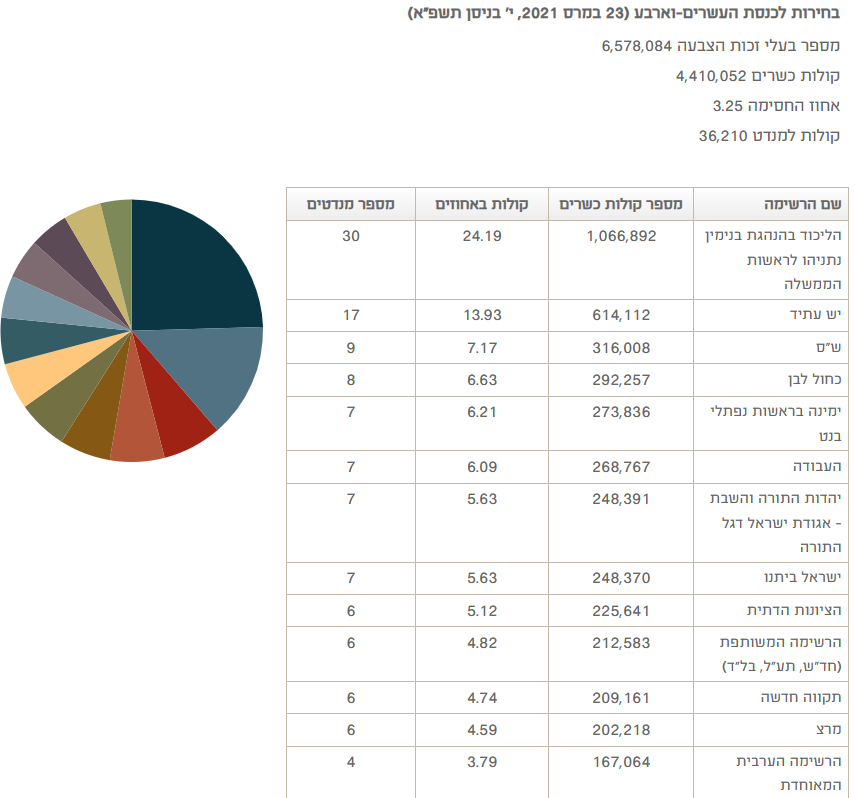

המפלגה הכי גדולה בכנסת ה 24 = הליכוד

סה"כ מנדטים = 120 כמספר חברי כנסת להלן speaker column

סה"כ מפלגות = 13


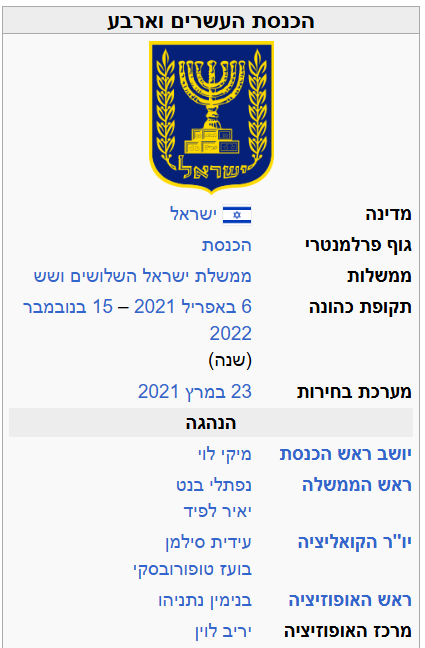

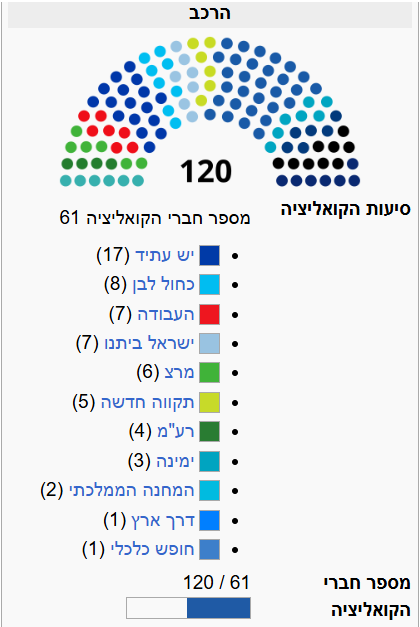

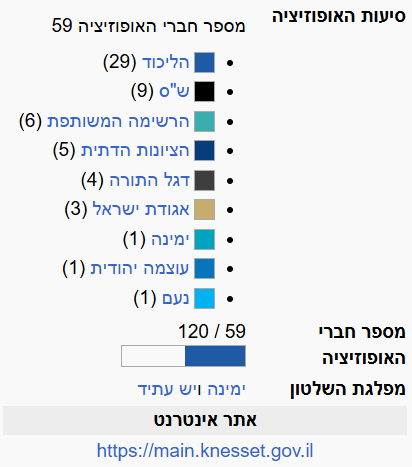

In [1]:
import pandas as pd
combined_df = pd.read_csv(r'combined_data.csv')

In [2]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14407 non-null  object 
 3   party        7428 non-null   object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


In [3]:
combined_df['speaker'] = combined_df['speaker'].str.strip() #normalization: There could be discrepancies in names (e.g., additional spaces, different spellings). Normalize speaker names before mapping.


In [4]:
# Initialize the dictionary to map speakers to parties
speaker_to_party = {}

# Add mappings for each party
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין שטרית"
]
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"

print(f"num_of_likud_speakers: {len(likud_speakers)}")

# Yesh Atid
yesh_atid_speakers = ["יאיר לפיד", "מירב כהן", "אורנה ברביבאי"]
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"

print(f"num_of_yesh_atid_speakers: {len(yesh_atid_speakers)}")

# Shas
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"

print(f"num_of_shas_speakers: {len(shas_speakers)}")

# Blue and White
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו שטה"
]
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"

print(f"num_of_blue_and_white_speakers: {len(blue_and_white_speakers)}")

# יהדות התורה
yahadut_hatora_speakers = [
    "ישראל אייכלר", "יעקב אשר", "אליהו ברוכי", "משה גפני", "יעקב טסלר",
    "יעקב ליצמן", "אורי מקלב", "יצחק זאב פינדרוס", "מאיר פרוש"
]
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"

print(f"num_of_yahadut_hatora_speakers: {len(yahadut_hatora_speakers)}")

# ימינה
yamina_speakers = [
    "ניר אורבך", "נפתלי בנט", "מתן כהנא", "יום טוב חי כלפון", "עידית סילמן",
    "שירלי פינטו קדוש", "אביר קארה", "עמיחי שיקלי", "איילת שקד"
]
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"

print(f"num_of_yamina_speakers: {len(yamina_speakers)}")

# הרשימה המשותפת
hareshima_hameshutefet_speakers = [
    "סמי אבו שחאדה", "אחמד טיבי", "עופר כסיף", "אוסאמה סעדי", "איימן עודה",
    "עאידה תומא סלימאן"
]
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"

print(f"num_of_hareshima_hameshutefet_speakers: {len(hareshima_hameshutefet_speakers)}")

# מרצ
meretz_speakers = [
    "יאיר גולן", "ניצן הורוביץ", "תמר זנדברג", "גבי לסקי", "עלי סלאלחה",
    "עיסאווי פריג'", "מיכל רוזין", "מוסי רז", "ג'ידא רינאוי זועבי"
]
for speaker in meretz_speakers:
    speaker_to_party[speaker] = "מרצ"

print(f"num_of_meretz_speakers: {len(meretz_speakers)}")

# הציונות הדתית
hazionut_hadatit_speakers = [
    "איתמר בן גביר", "מיכל מרים וולדיגר", "אבי מעוז", "אורית סטרוק",
    "בצלאל סמוטריץ'", "שמחה רוטמן"
]
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] = "הציונות הדתית"

print(f"num_of_hazionut_hadatit_speakers: {len(hazionut_hadatit_speakers)}")

# תקווה חדשה
tikva_hadasha_speakers = [
    "זאב אלקין", "זאב בנימין בגין", "מישל בוסקילה", "צבי האוזר",
    "יועז הנדל", "שרן מרים השכל", "מאיר יצחק-הלוי", "גדעון סער",
    "יפעת שאשא ביטון", "מיכל שיר סגמן"
]
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] = "תקווה חדשה"

print(f"num_of_tikva_hadasha_speakers: {len(tikva_hadasha_speakers)}")

# הרשימה הערבית המאוחדת
hareshima_haaravit_speakers = [
    "סעיד אלחרומי", "מאזן גנאים", "אימאן חטיב יאסין", "ווליד טאהא", "מנסור עבאס"
]
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] = "הרשימה הערבית המאוחדת"

print(f"num_of_hareshima_haaravit_speakers: {len(hareshima_haaravit_speakers)}")

# העבודה
haavoda_speakers = [
    "עמר בר-לב", "נעמה לזימי", "אמילי חיה מואטי", "מרב מיכאלי", "אבתיסאם מראענה",
    "גלעד קריב", "אפרת רייטן מרום", "רם שפע"
]
for speaker in haavoda_speakers:
    speaker_to_party[speaker] = "העבודה"

print(f"num_of_haavoda_speakers: {len(haavoda_speakers)}")

# ישראל ביתנו
israel_beitenu_speakers = [
    "אלי אבידר", "אלינה ברדץ יאלוב", "אביגדור ליברמן", "לימור מגן תלם",
    "יוליה מלינובסקי", "יבגני סובה", "חמד עמאר", "עודד פורר",
    "אלכס קושניר", "שרון רופא אופיר", "יוסף שיין"
]
for speaker in israel_beitenu_speakers:
    speaker_to_party[speaker] = "ישראל ביתנו"

print(f"num_of_israel_beitenu_speakers: {len(israel_beitenu_speakers)}")


num_of_likud_speakers: 30
num_of_yesh_atid_speakers: 3
num_of_shas_speakers: 10
num_of_blue_and_white_speakers: 11
num_of_yahadut_hatora_speakers: 9
num_of_yamina_speakers: 9
num_of_hareshima_hameshutefet_speakers: 6
num_of_meretz_speakers: 9
num_of_hazionut_hadatit_speakers: 6
num_of_tikva_hadasha_speakers: 10
num_of_hareshima_haaravit_speakers: 5
num_of_haavoda_speakers: 8
num_of_israel_beitenu_speakers: 11


In [5]:
total_speakers = (
    len(likud_speakers) +
    len(yesh_atid_speakers) +
    len(shas_speakers) +
    len(blue_and_white_speakers) +
    len(yahadut_hatora_speakers) +
    len(yamina_speakers) +
    len(hareshima_hameshutefet_speakers) +
    len(meretz_speakers) +
    len(hazionut_hadatit_speakers) +
    len(tikva_hadasha_speakers) +
    len(hareshima_haaravit_speakers) +
    len(haavoda_speakers) +
    len(israel_beitenu_speakers)
)

print(f"Total number of speakers: {total_speakers}")


Total number of speakers: 127


In [6]:
combined_df.speaker.unique()

array([nan, 'מיקי לוי', 'דן מרזוק', 'אוריאל בוסו', 'מוסי רז',
       'בועז טופורובסקי', 'אבי מעוז', 'עופר כסיף', 'משה אבוטבול',
       'גבי לסקי', 'יולי יואל אדלשטיין', 'מופיד מרעי', 'אחמד טיבי',
       'ישראל אייכלר', 'טטיאנה מזרסקי', 'יבגני סובה', 'צבי האוזר',
       'ניר אורבך', 'גלעד קריב', 'עודד פורר', 'אפרת רייטן מרום',
       'אורלי לוי אבקסיס', 'נעמה לזימי', 'דוד ביטן', 'אורי מקלב',
       'יוסף טייב', 'אוסאמה סעדי', 'יעל רון בן משה', 'משה טור פז',
       'אורנה ברביבאי', 'ענבר בזק', 'לימור מגן תלם', 'עלי סלאלחה',
       'גדעון סער', 'יריב לוין', 'איתן גינזבורג', 'יעקב מרגי', 'רון כץ',
       'יועז הנדל', 'שמחה רוטמן', 'יעקב אשר', 'אופיר אקוניס', 'נפתלי בנט',
       'בנימין נתניהו', 'קריאה', 'קריאות', 'אופיר כץ', 'מירב בן ארי',
       'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי', 'פטין מולא',
       'אמיר אוחנה', 'מאי גולן', 'משה ארבל', "בצלאל סמוטריץ'",
       'בנימין גנץ', 'איתמר בן גביר', 'עאידה תומא סלימאן', 'איימן עודה',
       'יפעת שאשא ביטון', 'מירי מרים רגב', 'זאב אל

In [7]:
# Get the unique speakers from combined_df, ensuring they are strings
unique_speakers_in_df = {str(speaker) for speaker in combined_df.speaker.unique() if isinstance(speaker, str)}

# Get the speakers from the mapping, ensuring they are strings
speakers_in_mapping = {str(speaker) for speaker in speaker_to_party.keys() if isinstance(speaker, str)}

# Find speakers in combined_df but not in the mapping
speakers_not_in_mapping = sorted(unique_speakers_in_df - speakers_in_mapping)
print("Speakers in combined_df but not in the mapping:")
for idx, speaker in enumerate(speakers_not_in_mapping, start=1):
    print(f"{idx}. {speaker}")

# Find speakers in the mapping but not in combined_df
speakers_not_in_df = sorted(speakers_in_mapping - unique_speakers_in_df)
print("\nSpeakers in the mapping but not in combined_df:")
for idx, speaker in enumerate(speakers_not_in_df, start=1):
    print(f"{idx}. {speaker}")


Speakers in combined_df but not in the mapping:
1. << קריאה >> מאיר פרוש
2. אופיר סופר
3. אורית מלכה סטרוק
4. אזורי עיסאווי
5. אילת שקד
6. אימאן ח'טיב יאסין
7. אלי כהן
8. אלינה ברדץ' יאלוב
9. אלינור ימין
10. אלעזר שטרן
11. בועז טופורובסקי
12. בנימין גנץ
13. דן מרזוק
14. הממשלה נפתלי בנט
15. ולדימיר בליאק
16. טטיאנה מזרסקי
17. יואב סגלוביץ'
18. יואל רזבוזוב
19. יוראי להב הרצנו
20. יסמין פרידמן
21. יצחק פינדרוס
22. מאיר יצחק הלוי
23. מאיר כהן
24. מיכל וולדיגר
25. מיקי לוי
26. מירב בן ארי
27. משה טור פז
28. נחמן שי
29. נירה שפק
30. סימון דוידסון
31. עידן רול
32. עמר בר לב
33. ענבר בזק
34. פנינה תמנו
35. קארין אלהרר
36. קריאה
37. קריאות
38. ראדה חסייסי
39. רוברטה מטסולה
40. רון כץ
41. רם בן ברק
42. תומא סלימאן (הרשימה המשותפת)

Speakers in the mapping but not in combined_df:
1. אביגדור ליברמן
2. אורית סטרוק
3. אורית פרקש הכהן
4. איילת שקד
5. אימאן חטיב יאסין
6. אלון טל
7. אלי אליהו כהן
8. אליהו ברוכי
9. אלינה ברדץ יאלוב
10. אריה מכלוף דרעי
11. בני גנץ
12. טלי פלוסקוב
13. יום טוב חי כלפון
1

In [8]:
# Fix discrepancies in combined_df and mapping
additional_mappings = {
    "<< קריאה >> מאיר פרוש": "יהדות התורה",
    "אופיר סופר": "הציונות הדתית",
    "אורית מלכה סטרוק": "הציונות הדתית",
    "אזורי עיסאווי": "מרצ",
    "אילת שקד": "ימינה",
    "אימאן ח'טיב יאסין": "הרשימה הערבית המאוחדת",
    "אלי כהן": "הליכוד",
    "אלינה ברדץ' יאלוב": "ישראל ביתנו",
    "אלינור ימין": "no party",  # מזכירות הכנסת
    "אלעזר שטרן": "כחול לבן",
    "בועז טופורובסקי": "יש עתיד",
    "בנימין גנץ": "כחול לבן",
    "דן מרזוק": "no party",  # מזכירות הכנסת
    "הממשלה נפתלי בנט": "ימינה",
    "ולדימיר בליאק": "יש עתיד",
    "טטיאנה מזרסקי": "יש עתיד",
    "יואב סגלוביץ'": "יש עתיד",
    "יואל רזבוזוב": "יש עתיד",
    "יוראי להב הרצנו": "יש עתיד",
    "יסמין פרידמן": "יש עתיד",
    "יצחק פינדרוס": "יהדות התורה",
    "מאיר יצחק הלוי": "תקווה חדשה",
    "מאיר כהן": "יש עתיד",
    "מיכל וולדיגר": "הציונות הדתית",
    "מיקי לוי": "יש עתיד",
    "מירב בן ארי": "יש עתיד",
    "משה טור פז": "יש עתיד",
    "נחמן שי": "העבודה",
    "נירה שפק": "יש עתיד",
    "סימון דוידסון": "יש עתיד",
    "עידן רול": "יש עתיד",
    "עמר בר לב": "העבודה",
    "ענבר בזק": "יש עתיד",
    "פנינה תמנו": "כחול לבן",
    "קארין אלהרר": "יש עתיד",
    "קריאה": "unknown speaker",  # Metadata, ignore
    "קריאות": "unknown speaker",  # Metadata, ignore
    "ראדה חסייסי": "no party",  # מזכירות הכנסת
    "רוברטה מטסולה": "no party",  # נשיאת הפרלמנט האירופי
    "רון כץ": "יש עתיד",
    "רם בן ברק": "יש עתיד",
    "תומא סלימאן (הרשימה המשותפת)": "הרשימה המשותפת",
}

# Merge additional mappings into the existing dictionary
speaker_to_party.update(additional_mappings)

# Remove unused mappings
unused_mappings = [
    "אורית סטרוק",  # Already mapped as "אורית מלכה סטרוק"
    "איילת שקד",  # Already mapped as "אילת שקד"
    "אימאן חטיב יאסין",  # Already mapped as "אימאן ח'טיב יאסין"
    "אלי אליהו כהן",  # Already mapped as "אלי כהן"
    "אלינה ברדץ יאלוב",  # Already mapped as "אלינה ברדץ' יאלוב"
    "עיסאווי פריג'",  # Already mapped as "אזורי עיסאווי"
    "עמר בר-לב",  # Already mapped as "עמר בר לב"
    "פנינה תמנו שטה",  # Already mapped as "פנינה תמנו"
]
for unused in unused_mappings:
    speaker_to_party.pop(unused, None)


In [9]:
def impute_party(df, mapping):
    """
    Impute missing 'party' values in the DataFrame based on the 'speaker_to_party' mapping.

    Parameters:
        df (pd.DataFrame): The DataFrame containing columns 'speaker' and 'party'.
        mapping (dict): A dictionary mapping speakers to their respective parties.

    Returns:
        pd.DataFrame: The updated DataFrame with imputed 'party' values.
    """
    # Impute missing 'party' values using the mapping
    df['party'] = df['speaker'].map(mapping).fillna(df['party'])
    return df

# Apply the function to impute missing party values
processed_combined_df = impute_party(combined_df, speaker_to_party)

# Inspect the result
print(processed_combined_df[['speaker', 'party']].head())


    speaker     party
0       NaN       NaN
1  מיקי לוי   יש עתיד
2  דן מרזוק  no party
3  מיקי לוי   יש עתיד
4  מיקי לוי   יש עתיד


In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14407 non-null  object 
 3   party        14407 non-null  object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


In [11]:
# Save the processed DataFrame to a CSV file
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

print("Imputed data has been saved to 'processed_combined_data.csv'.")


Imputed data has been saved to 'processed_combined_data.csv'.


In [12]:
missing_party = processed_combined_df[processed_combined_df['party'].isna()]
print(missing_party[['speaker', 'party']].head())
print(f"Number of rows with missing 'party': {len(missing_party)}")


     speaker party
0        NaN   NaN
2048     NaN   NaN
4006     NaN   NaN
4077     NaN   NaN
4707     NaN   NaN
Number of rows with missing 'party': 11


In [13]:
missing_speakers = missing_party['speaker'].unique()
print(f"Speakers with missing 'party': {missing_speakers}")


Speakers with missing 'party': [nan]


In [14]:
missing_in_mapping = [speaker for speaker in missing_speakers if speaker not in speaker_to_party]
print(f"Speakers not in mapping: {missing_in_mapping}")


Speakers not in mapping: [nan]


In [15]:
missing_speaker_rows = processed_combined_df[processed_combined_df['speaker'].isna()]
print(missing_speaker_rows.head())
print(f"Number of rows with missing 'speaker': {len(missing_speaker_rows)}")


      knesset  session speaker party role  \
0         NaN      127     NaN   NaN  NaN   
2048      NaN      129     NaN   NaN  NaN   
4006      NaN      130     NaN   NaN  NaN   
4077      NaN      131     NaN   NaN  NaN   
4707      NaN      132     NaN   NaN  NaN   

                                                   text  \
0                         דברי הכנסתחוברת כ"וישיבה קכ"ז   
2048  דברי הכנסתכז / מושב שני / ישיבות קכ"ט–קל"א /ט"...   
4006                       דברי הכנסתחוברת כ"זישיבה ק"ל   
4077                      דברי הכנסתחוברת כ"זישיבה קל"א   
4707  דברי הכנסתכח / מושב שני / ישיבות קל"ב–קל"ד /כ"...   

                           subject sub_subject  
0     מסמכים שהונחו על שולחן הכנסת         NaN  
2048  מסמכים שהונחו על שולחן הכנסת         NaN  
4006  מסמכים שהונחו על שולחן הכנסת         NaN  
4077                שאילתות דחופות         NaN  
4707  מסמכים שהונחו על שולחן הכנסת         NaN  
Number of rows with missing 'speaker': 11


מה שעזר לתייג את כל המפלגות באופן סופי ובהתאם לדובר, היה נורמליזציה שלמעשה מורידה רווחים או איות שונה אצל הדובר ולמעשה מחדד מי הוא הדובר. רק לאחר מכן עושים מיפוי למפלגות ואז הצלחה מובטחת !!

נותרו 11 שורות בהן הדובר אינו ידוע והמפלגה אינה ידועה גם היא.

יש תיוג של מספר דוברי מזכירות הכנסת ונשיאת הפרלמנט האירופאי כ"ללא מפלגה" במפלגה.

יש תיוג של מספר שורות של מטאדאטה כלשהו, כלומר דובר עם משהו אחר שאינו שם אלא קריאה כלשהי וגם זה מתוייג כ"דובר אינו ידוע" במפלגה.



להלן צילום מסך של השורות עם דובר שמתוייג כ"קריאה" למשל, וניתן לראות שיש טקסט שמישהו מדבר ואומר. כלומר במצב כזה נידרש להמשך תיוג בעזרת

count vectorizer

כדי להתאים את הדובר למילות המפתח שנאמרו בטקסט.

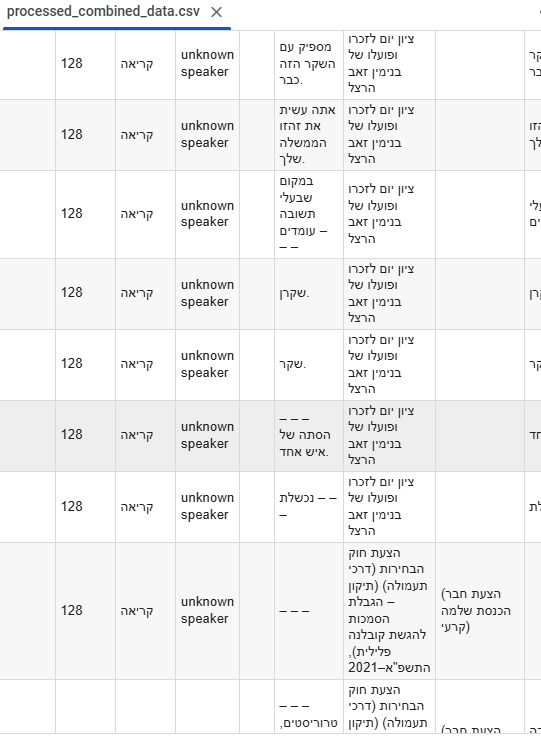

In [16]:
# Filter rows where the 'speaker' column is NaN
missing_speaker_rows = combined_df[combined_df['speaker'].isna()]

# Display the rows
print(missing_speaker_rows)

# Optional: Save to a CSV for manual review
missing_speaker_rows.to_csv("missing_speaker_rows.csv", index=False)


       knesset  session speaker party role  \
0          NaN      127     NaN   NaN  NaN   
2048       NaN      129     NaN   NaN  NaN   
4006       NaN      130     NaN   NaN  NaN   
4077       NaN      131     NaN   NaN  NaN   
4707       NaN      132     NaN   NaN  NaN   
6837       NaN      133     NaN   NaN  NaN   
6888       NaN      134     NaN   NaN  NaN   
8614       NaN      135     NaN   NaN  NaN   
9643       NaN      136     NaN   NaN  NaN   
9961       NaN      137     NaN   NaN  NaN   
12373      NaN      138     NaN   NaN  NaN   

                                                    text  \
0                          דברי הכנסתחוברת כ"וישיבה קכ"ז   
2048   דברי הכנסתכז / מושב שני / ישיבות קכ"ט–קל"א /ט"...   
4006                        דברי הכנסתחוברת כ"זישיבה ק"ל   
4077                       דברי הכנסתחוברת כ"זישיבה קל"א   
4707   דברי הכנסתכח / מושב שני / ישיבות קל"ב–קל"ד /כ"...   
6837                       דברי הכנסתחוברת כ"חישיבה קל"ג   
6888                       

**ניתן לצפות בפרטי 11 השורות בהן אין דובר&מפלגה בתמונות הבאות :**

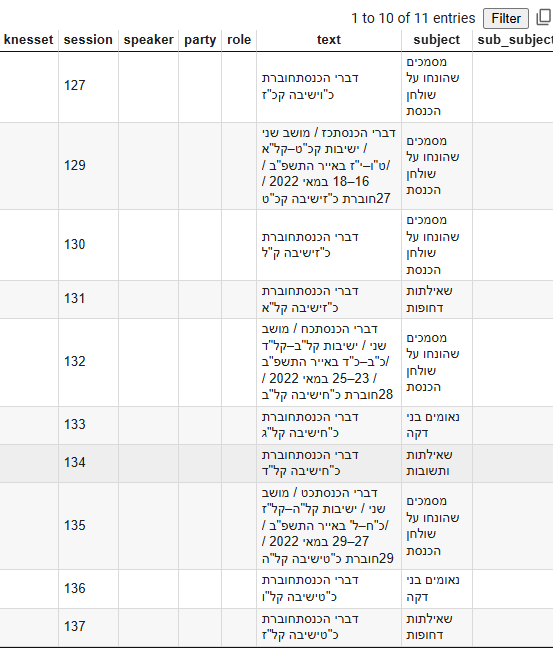

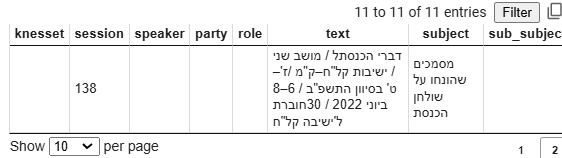

הצילומי מסך הקודמים היו עבור 11 השורות בלבד, אבל אז פילטרתי בקובץ החדש שיצרתי

processed_combined_data.csv

לאחר

imputation speaker_to_party

לפי מילות מפתח "דברי הכנסתחוברת" ומצאתי כי מי שפותח באופן זה את המליאה הוא היו"ר איתן גינזבורג ממפלגת כחול לבן.

להלן הוכחה מצולמת:


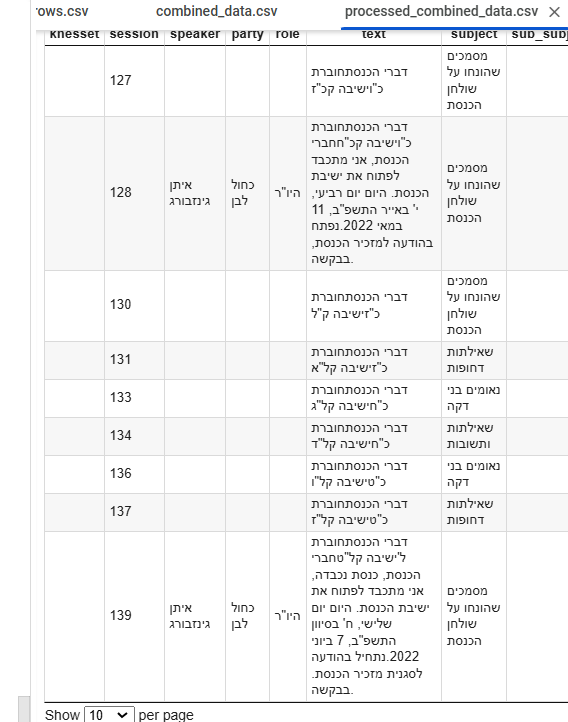

In [17]:
# Filter rows with NaN in 'speaker' and the specific keyword in 'text'
keyword =  "דברי הכנסתחוברת כ"
rows_to_update = (processed_combined_df['speaker'].isna()) & (processed_combined_df['text'].str.contains(keyword, na=False))

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

print(f"Imputed {rows_to_update.sum()} rows with speaker as איתן גינזבורג and party as כחול לבן.")


Imputed 7 rows with speaker as איתן גינזבורג and party as כחול לבן.


אחרי הפילטור הנ"ל שוב יש שמירה לקובץ

processed_combined_data.csv

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14414 non-null  object 
 3   party        14414 non-null  object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


In [175]:
# Normalize the 'text' column for consistent keyword matching
processed_combined_df['text_normalized'] = (
    processed_combined_df['text']
    .str.lower()  # Lowercase
    .str.strip()  # Strip leading/trailing whitespace
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
)

# Check for rows with NaN speakers and normalized keyword
rows_to_update = (
    processed_combined_df['speaker'].isna() &
    processed_combined_df['text_normalized'].str.contains("דברי הכנסתחוברת", na=False)
)

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

# Print the number of rows updated
print(f"Imputed {rows_to_update.sum()} additional rows with speaker as איתן גינזבורג and party as כחול לבן.")


Imputed 0 additional rows with speaker as איתן גינזבורג and party as כחול לבן.


עדיין חסר התיוג לגבי 4 מקרים נוספים, כי המילות מפתח טיפה שונות ולכן בהמשך השתמשתי בעמודת ה

subject

שגם פילטור שלה הראה אותה אבחנה לאותן שורות חסרות דובר שהן למעשה רלוונטיות ליו"ר הכנסת.

In [19]:
# Filter rows where the 'speaker' column is NaN
missing_speaker_rows2 = combined_df[combined_df['speaker'].isna()]

# Display the rows
print(missing_speaker_rows2)

# Optional: Save to a CSV for manual review
missing_speaker_rows2.to_csv("missing_speaker_rows2.csv", index=False)


       knesset  session speaker party role  \
2048       NaN      129     NaN   NaN  NaN   
4707       NaN      132     NaN   NaN  NaN   
8614       NaN      135     NaN   NaN  NaN   
12373      NaN      138     NaN   NaN  NaN   

                                                    text  \
2048   דברי הכנסתכז / מושב שני / ישיבות קכ"ט–קל"א /ט"...   
4707   דברי הכנסתכח / מושב שני / ישיבות קל"ב–קל"ד /כ"...   
8614   דברי הכנסתכט / מושב שני / ישיבות קל"ה–קל"ז /כ"...   
12373  דברי הכנסתל / מושב שני / ישיבות קל"ח–ק"מ /ז'–ט...   

                            subject sub_subject  
2048   מסמכים שהונחו על שולחן הכנסת         NaN  
4707   מסמכים שהונחו על שולחן הכנסת         NaN  
8614   מסמכים שהונחו על שולחן הכנסת         NaN  
12373  מסמכים שהונחו על שולחן הכנסת         NaN  


In [20]:
# # Check for rows with NaN speakers and normalized keyword
# rows_to_update = (
#     processed_combined_df['speaker'].isna() &
#     processed_combined_df['text_normalized'].str.contains("דברי הכנסתל", na=False)
# )

# # Impute 'speaker' and 'party' for these rows
# processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
# processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# # Save the updated DataFrame to a new CSV
# processed_combined_df.to_csv("processed_combined_data.csv", index=False)

# # Print the number of rows updated
# print(f"Imputed {rows_to_update.sum()} additional rows with speaker as איתן גינזבורג and party as כחול לבן.")

KeyError: 'text_normalized'

In [21]:
# Check for rows with NaN speakers and normalized keyword
rows_to_update = (
    processed_combined_df['speaker'].isna() &
    processed_combined_df['subject'].str.contains("מסמכים שהונחו", na=False)
)

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

# Print the number of rows updated
print(f"Imputed {rows_to_update.sum()} additional rows with speaker as איתן גינזבורג and party as כחול לבן.")

Imputed 4 additional rows with speaker as איתן גינזבורג and party as כחול לבן.


In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  int64  
 2   speaker      14418 non-null  object 
 3   party        14418 non-null  object 
 4   role         6331 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 901.2+ KB


**Verify imputation of party:**

In [23]:
print(combined_df['party'].value_counts())
print(combined_df['party'].isnull().sum())


party
הליכוד                   3783
יש עתיד                  1585
ישראל ביתנו              1356
תקווה חדשה               1228
ש"ס                      1070
כחול לבן                  893
הרשימה המשותפת            893
מרצ                       663
הציונות הדתית             652
יהדות התורה               621
unknown speaker           616
העבודה                    318
הרשימה הערבית המאוחדת     293
ימינה                     263
no party                  184
Name: count, dtype: int64
0


In [24]:
import pandas as pd

# Example: Replace with your actual dataframe
# df = pd.read_csv("your_dataset.csv")

# Group by party and extract unique speakers for each party
party_to_speakers = (
    combined_df.groupby("party")["speaker"]
    .apply(lambda x: x.dropna().unique().tolist())
    .to_dict()
)

# Display unique speakers per party
for party, speakers in party_to_speakers.items():
    print(f"{party}: {len(speakers)} speakers")
    print(speakers)
    print()


no party: 4 speakers
['דן מרזוק', 'אלינור ימין', 'רוברטה מטסולה', 'ראדה חסייסי']

unknown speaker: 2 speakers
['קריאה', 'קריאות']

הליכוד: 29 speakers
['יולי יואל אדלשטיין', 'אורלי לוי אבקסיס', 'דוד ביטן', 'יריב לוין', 'אופיר אקוניס', 'בנימין נתניהו', 'אופיר כץ', 'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי', 'פטין מולא', 'אמיר אוחנה', 'מאי גולן', 'מירי מרים רגב', 'יואב קיש', 'אלי כהן', 'יואב גלנט', 'דסטה גדי יברקן', 'ישראל כץ', 'יובל שטייניץ', 'קטי קטרין שטרית', 'ניר ברקת', 'אבי דיכטר', 'קרן ברק', 'חיים כץ', 'גילה גמליאל', 'חוה אתי עטייה', 'מכלוף מיקי זוהר', 'צחי הנגבי']

העבודה: 9 speakers
['גלעד קריב', 'אפרת רייטן מרום', 'נעמה לזימי', 'מרב מיכאלי', 'אמילי חיה מואטי', 'רם שפע', 'עמר בר לב', 'אבתיסאם מראענה', 'נחמן שי']

הציונות הדתית: 7 speakers
['אבי מעוז', 'שמחה רוטמן', "בצלאל סמוטריץ'", 'איתמר בן גביר', 'אורית מלכה סטרוק', 'מיכל וולדיגר', 'אופיר סופר']

הרשימה המשותפת: 7 speakers
['עופר כסיף', 'אחמד טיבי', 'אוסאמה סעדי', 'עאידה תומא סלימאן', 'איימן עודה', 'סמי אבו שחאדה', 'תומא ס

In [25]:
# Create a mapping of speakers to parties
speaker_to_parties = combined_df.groupby("speaker")["party"].apply(lambda x: x.dropna().unique().tolist())

# Filter for speakers associated with multiple parties
multi_party_speakers = speaker_to_parties[speaker_to_parties.apply(len) > 1]

# Display the results
if multi_party_speakers.empty:
    print("No speakers are associated with multiple parties.")
else:
    print("Speakers associated with multiple parties:")
    for speaker, parties in multi_party_speakers.items():
        print(f"{speaker}: {', '.join(parties)}")


No speakers are associated with multiple parties.


**איזה דוברים מופיעים בכל מליאה**:

In [26]:
import pandas as pd

# Example: Replace with your actual dataframe
# df = pd.read_csv("your_dataset.csv")

# Group by session and extract unique speakers for each session
session_to_speakers = (
    combined_df.groupby("session")["speaker"]
    .apply(lambda x: x.dropna().unique().tolist())
    .to_dict()
)

# Display unique speakers per session
for session, speakers in session_to_speakers.items():
    print(f"Session {session}: {len(speakers)} speakers")
    print(speakers)
    print()


Session 127: 35 speakers
['איתן גינזבורג', 'מיקי לוי', 'דן מרזוק', 'אוריאל בוסו', 'מוסי רז', 'בועז טופורובסקי', 'אבי מעוז', 'עופר כסיף', 'משה אבוטבול', 'גבי לסקי', 'יולי יואל אדלשטיין', 'מופיד מרעי', 'אחמד טיבי', 'ישראל אייכלר', 'טטיאנה מזרסקי', 'יבגני סובה', 'צבי האוזר', 'ניר אורבך', 'גלעד קריב', 'עודד פורר', 'אפרת רייטן מרום', 'אורלי לוי אבקסיס', 'נעמה לזימי', 'דוד ביטן', 'אורי מקלב', 'יוסף טייב', 'אוסאמה סעדי', 'יעל רון בן משה', 'משה טור פז', 'אורנה ברביבאי', 'ענבר בזק', 'לימור מגן תלם', 'עלי סלאלחה', 'גדעון סער', 'יריב לוין']

Session 128: 91 speakers
['איתן גינזבורג', 'דן מרזוק', 'עופר כסיף', 'עודד פורר', 'יעל רון בן משה', 'יעקב מרגי', 'רון כץ', 'יועז הנדל', 'שמחה רוטמן', 'יעקב אשר', 'אופיר אקוניס', 'אוריאל בוסו', 'מיקי לוי', 'נפתלי בנט', 'בנימין נתניהו', 'קריאה', 'קריאות', 'אופיר כץ', 'מירב בן ארי', 'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי', 'פטין מולא', 'אמיר אוחנה', 'מאי גולן', 'צבי האוזר', 'משה ארבל', "בצלאל סמוטריץ'", 'משה אבוטבול', 'גדעון סער', 'בנימין גנץ', 'איתמר בן ג

In [27]:
# Group by session and speaker_to_party, then count occurrences
party_counts = combined_df.groupby(["session", "party"]).size().reset_index(name="party_per_session_count")

# Display the result
print(party_counts)

     session           party  party_per_session_count
0        127        no party                        1
1        127          הליכוד                       94
2        127          העבודה                       21
3        127   הציונות הדתית                        2
4        127  הרשימה המשותפת                       11
..       ...             ...                      ...
166      139           ימינה                        4
167      139         יש עתיד                        3
168      139        כחול לבן                       12
169      139             מרצ                        7
170      139             ש"ס                        7

[171 rows x 3 columns]


אפשר לראות שיש תיוג מלא של הדוברים והמפלגות וגם נושאי הדיון במליאה.

שימי לב שחסר בעמודת ה

text

מה עוד יש לעשות:

1. לבדוק מי המפלגות שמופיעות עבור ה4 שורות עם טקסט חסר, גם אותן צריך לספור להבנתי. אפשר לוודא עם יובל.
לפי יובל זה תלוי בפיצ'רים כי אם הם תלויים בטקסט אז מן הסתם שתהיה בעיה כי אין טקסט.

2. בבלוק קוד האחרון צריך שהקוד גם יחלק את הדוברים שמופיעים בכל מליאה, למפלגות שלהם ויספור כמה מאותה מפלגה יש באותה מליאה. זה אגב מתקשר ל y label

3. לנסות לפענח מי זה הדובר שרשמתי תחת מפלגה unknown speaker
אולי באמצעות מילות מפתח, יש הרבה "שקר" שם ואולי גם באמצעות
count vectorizer
ובעצם לאחר שנבין מי הדובר אז נוכל לתייג את המפלגה שלו. יש לא מעט שורות כאלו ולכן זה חשוב.

4. הכנת פיצ'ר בינארי של 1 הליכוד וכל שאר המפלגות יקבלו 0

5. הכנת פיצ'ר שסופר את כמות המפלגות בכל מליאה שזה המשתנה מטרה למעשה

6. הכנת פיצ'רים שסופרים את כמות התווים בטקסט ו/או את כמות התווים שאינם אותיות כמו סימני קריאה

7. לנקות עמודות שלא צריך, לדעתי את role, sub subject, knesset
לדעתי גם צריך לעשות משהו עם הרעש של "ללא מפלגה" כי זה לא רלוונטי לתרגיל בכלל.

8. לשים אינדקס ?

9. להמשיך למודל ראשון ברגרסיה לינארית

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv("processed_combined_data.csv")

# Group by Session and Party
grouped = df.groupby(["session", "party"]).size().reset_index(name="count")

# Pivot the table
table = grouped.pivot(index="session", columns="party", values="count").fillna(0)

# Rename columns (if needed)
table.rename(columns={"no party": "no party", "unknown speaker": "unknown speaker", "הליכוד": "הליכוד", "יש עתיד": "יש עתיד", "ש\"ס":"ש\"ס", "כחול לבן":"כחול לבן", "יהדות התורה":"יהדות התורה", "ימינה":"ימינה","הרשימה המשותפת":"הרשימה המשותפת", "מרצ":"מרצ", "הציונות הדתית":"הציונות הדתית", "תקווה חדשה":"תקווה חדשה", "הרשימה הערבית המאוחדת":"הרשימה הערבית המאוחדת", "העבודה":"העבודה","ישראל ביתנו":"ישראל ביתנו"}, inplace=True)

# Ensure all values are integers
table = table.astype(int)

# Save the table to a new CSV file
table.to_csv("session_party_counts.csv")

print("Table saved to session_party_counts.csv")

print(table)




Table saved to session_party_counts.csv
party    no party  unknown speaker  הליכוד  העבודה  הציונות הדתית  \
session                                                             
127             1                0      94      21              2   
128            18               84     375      67             95   
129             8              100     632      26            120   
130             1                1       1       0              2   
131             0               10      90       6             23   
132            11               60     718      17             95   
133             1                0       2       0              1   
134            42               73     437      41             64   
135            14                8     232      10             63   
136             1                2      63       0              1   
137            65              153     643     123            126   
138            20              123     441       7             